
## 1 - Introduction des données fournies dans le fichier JSON

Le fichier JSON contient des données statistiques sur différentes régions de Madagascar, regroupées par catégories démographiques et socio-économiques. Ces informations sont organisées de manière structurée pour chaque région, ainsi que pour l’ensemble du pays ("MADAGASCAR").

#### **Structure des données** :
1. **Niveau régional** :
   - Chaque région est une clé, contenant des sous-catégories.
   - La région "MADAGASCAR" représente un résumé global des données.

2. **Catégories principales** :
   - **Données urbaines et rurales** : Réparties en sous-catégories pour les sexes (hommes, femmes) et la population totale.
   - **Quintiles économiques** : Répartition de la population selon cinq classes économiques allant des plus pauvres aux plus riches.

#### **Variables principales** :
- **Urban** : Pourcentage de la population urbaine (hommes, femmes, total).
- **Rural** : Pourcentage de la population rurale (hommes, femmes, total).
- **Economic quintiles** :
  - Pourcentage de la population dans les groupes économiques (poorest, 2nd quintile, 3rd quintile, 4th quintile, richest).

#### **Intérêt des données** :
- **Analyse socio-économique** : Permet de comparer les niveaux de vie entre les régions.
- **Étude démographique** : Donne un aperçu des disparités entre les zones urbaines et rurales.
- **Clustering** : Identifie des similarités et des groupes homogènes de régions selon leurs caractéristiques démographiques et économiques.
- **Prise de décision** : Utile pour orienter des politiques publiques ciblées (développement régional, lutte contre les inégalités).

---



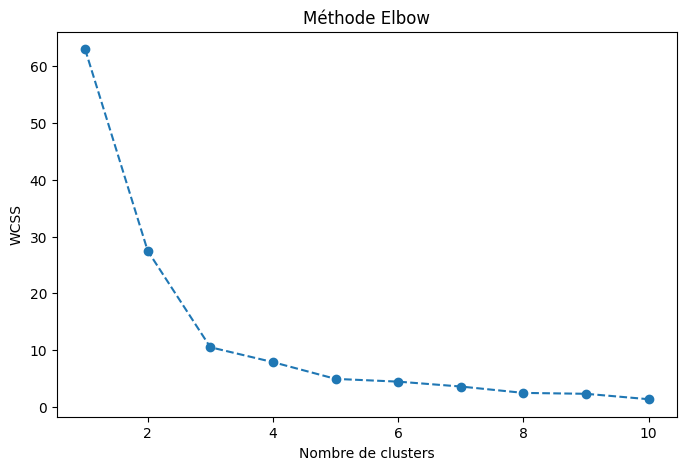

Les résultats ont été sauvegardés dans 'clustered_regions.csv'.


In [11]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Charger le fichier JSON
file_path = "instat.json"  # Remplacez par le chemin de votre fichier
with open(file_path, 'r') as file:
    data = json.load(file)

# Convertir les données en DataFrame
regions = []
urban_totals = []
rural_totals = []
economic_totals = []

for region, stats in data.items():
    if region != "MADAGASCAR":  # Exclure la ligne globale
        regions.append(region)
        urban_totals.append(stats["urban"]["total"])
        rural_totals.append(stats["rural"]["total"])
        economic_totals.append(stats["economic_quintiles"]["total"])

df = pd.DataFrame({
    "Region": regions,
    "Urban_Total": urban_totals,
    "Rural_Total": rural_totals,
    "Economic_Quintile_Total": economic_totals
})


# Standardisation des données pour le clustering
features = df[["Urban_Total", "Rural_Total", "Economic_Quintile_Total"]]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Méthode Elbow pour déterminer le nombre optimal de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker="o", linestyle="--")
plt.title("Méthode Elbow")
plt.xlabel("Nombre de clusters")
plt.ylabel("WCSS")
plt.show()



# Sauvegarde des résultats
df.to_csv("clustered_regions.csv", index=False)
print("Les résultats ont été sauvegardés dans 'clustered_regions.csv'.")


## 2-Visualisation pertinante pour ces données

<ipython-input-12-d69c8758f1d3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Region", y="Urban_Total", palette="Blues_d")


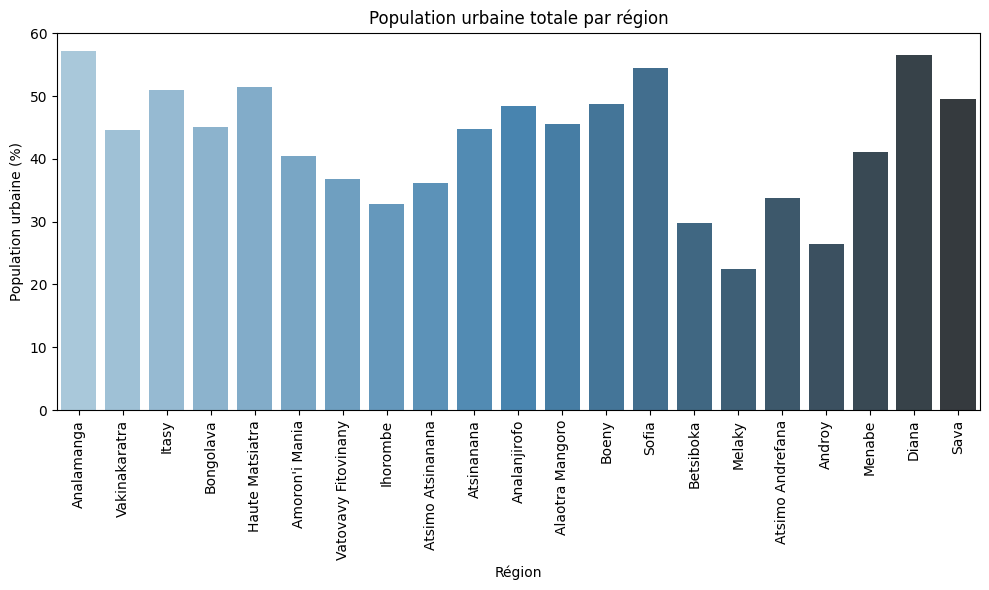

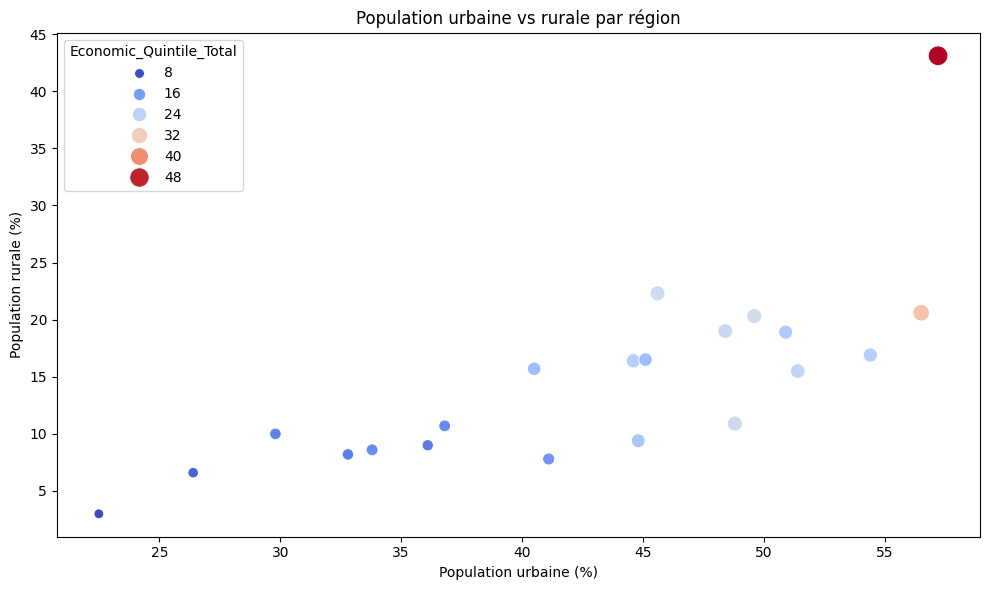

In [12]:
# Visualisations
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Region", y="Urban_Total", palette="Blues_d")
plt.xticks(rotation=90)
plt.title("Population urbaine totale par région")
plt.xlabel("Région")
plt.ylabel("Population urbaine (%)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Urban_Total", y="Rural_Total", hue="Economic_Quintile_Total", palette="coolwarm", size="Economic_Quintile_Total", sizes=(50, 200))
plt.title("Population urbaine vs rurale par région")
plt.xlabel("Population urbaine (%)")
plt.ylabel("Population rurale (%)")
plt.tight_layout()
plt.show()

## 3 - Clusturing des régions

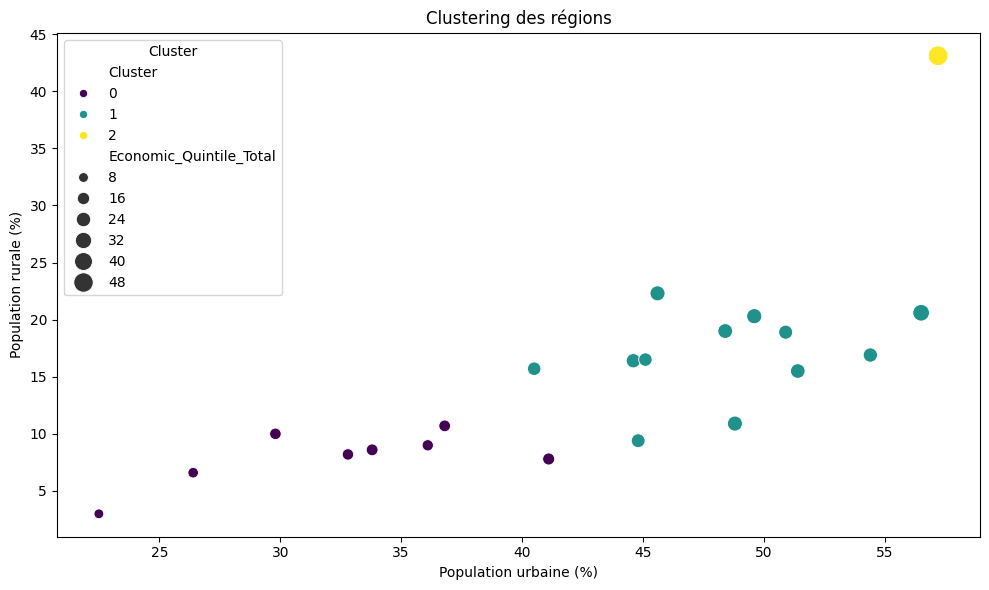

In [13]:
# Clustering avec le nombre optimal de clusters (exemple : 3)
n_clusters = 3  # Ajustez après observation du graphique Elbow
kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42)
df["Cluster"] = kmeans.fit_predict(scaled_features)

# Visualisation des clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Urban_Total", y="Rural_Total", hue="Cluster", palette="viridis", size="Economic_Quintile_Total", sizes=(50, 200))
plt.title("Clustering des régions")
plt.xlabel("Population urbaine (%)")
plt.ylabel("Population rurale (%)")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

## 4 - Interpretation
 Les régions sont divisées en 3 groupes distincts, représentés par les différentes couleurs. L'axe des abscisses indique le pourcentage de population urbaine, tandis que l'axe des ordonnées représente le quintile économique. Ce clustering suggère qu'il existe des groupes de régions ayant des caractéristiques similaires en termes d'urbanisation et de développement économique.